# Heart Disease Analysis and Prediction
In this notebook, we'll analyze the heart.csv dataset and build a predictive model for heart disease. The dataset contains various patient features that we'll explore to understand their relationship with heart disease.

# Riyasdeen Abdul Hakkim (n01708860)


## 1. Import Required Libraries
First, let's import the necessary libraries for our analysis.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# For better visualizations
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## 2. Load and Explore the Dataset
Let's load the dataset and perform initial exploratory data analysis.

In [40]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding the target variable
print("\nFirst few rows:")
df.head()

Dataset Information:
Number of samples: 918
Number of features: 11

First few rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [42]:
# Display summary statistics for numerical features
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 3. Categorical Features Analysis
Let's explore the categorical features in our dataset to better understand their distributions.

In [43]:
# Display categorical feature distributions
for col in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print("Percentage:")
    percentage = df[col].value_counts(normalize=True) * 100
    print(percentage.map("{:.2f}%".format))


Sex distribution:
Sex
M    725
F    193
Name: count, dtype: int64
Percentage:
Sex
M    78.98%
F    21.02%
Name: proportion, dtype: object

ChestPainType distribution:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
Percentage:
ChestPainType
ASY    54.03%
NAP    22.11%
ATA    18.85%
TA      5.01%
Name: proportion, dtype: object

FastingBS distribution:
FastingBS
0    704
1    214
Name: count, dtype: int64
Percentage:
FastingBS
0    76.69%
1    23.31%
Name: proportion, dtype: object

RestingECG distribution:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
Percentage:
RestingECG
Normal    60.13%
LVH       20.48%
ST        19.39%
Name: proportion, dtype: object

ExerciseAngina distribution:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Percentage:
ExerciseAngina
N    59.59%
Y    40.41%
Name: proportion, dtype: object

ST_Slope distribution:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

## 4. Visualizing the Data
Now, let's create visualizations to better understand the relationships between different features and heart disease.

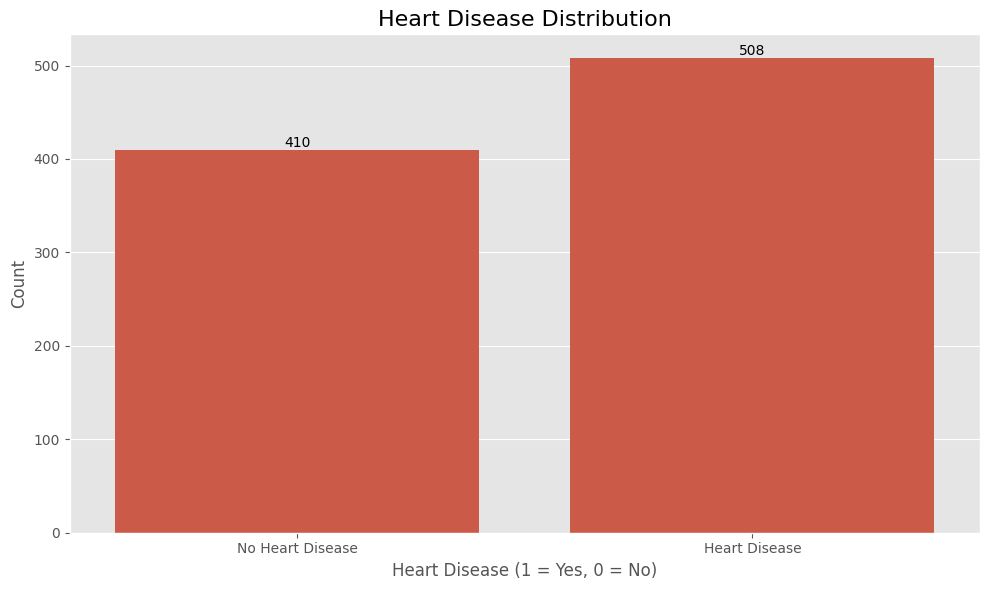

In [44]:
# Create a directory for visualizations if needed
import os
os.makedirs('visualizations', exist_ok=True)

# Heart Disease Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.savefig('visualizations/heart_disease_distribution.png')
plt.show()

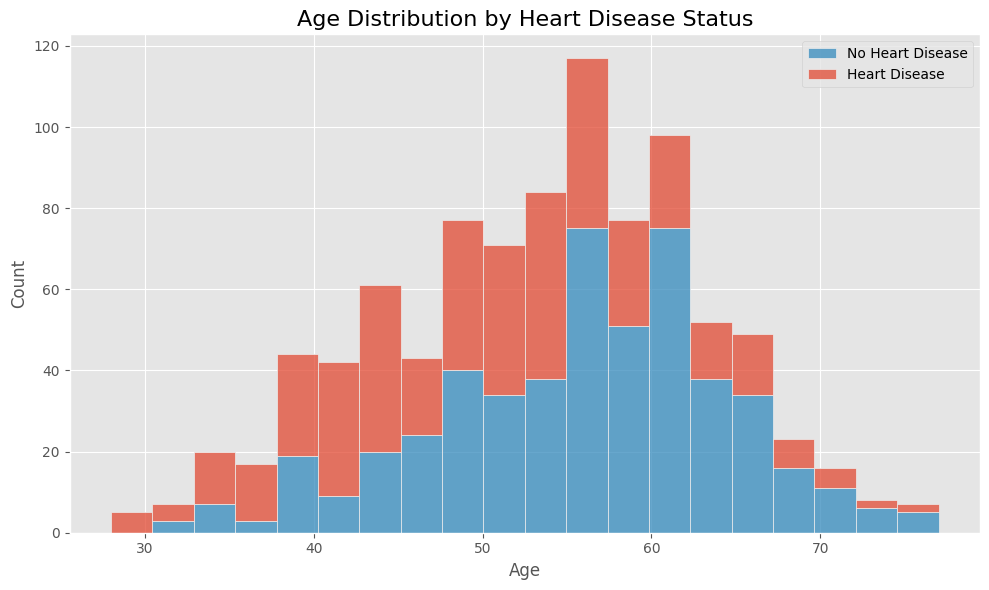

In [45]:
# Age distribution by heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', bins=20)
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.savefig('visualizations/age_distribution.png')
plt.show()

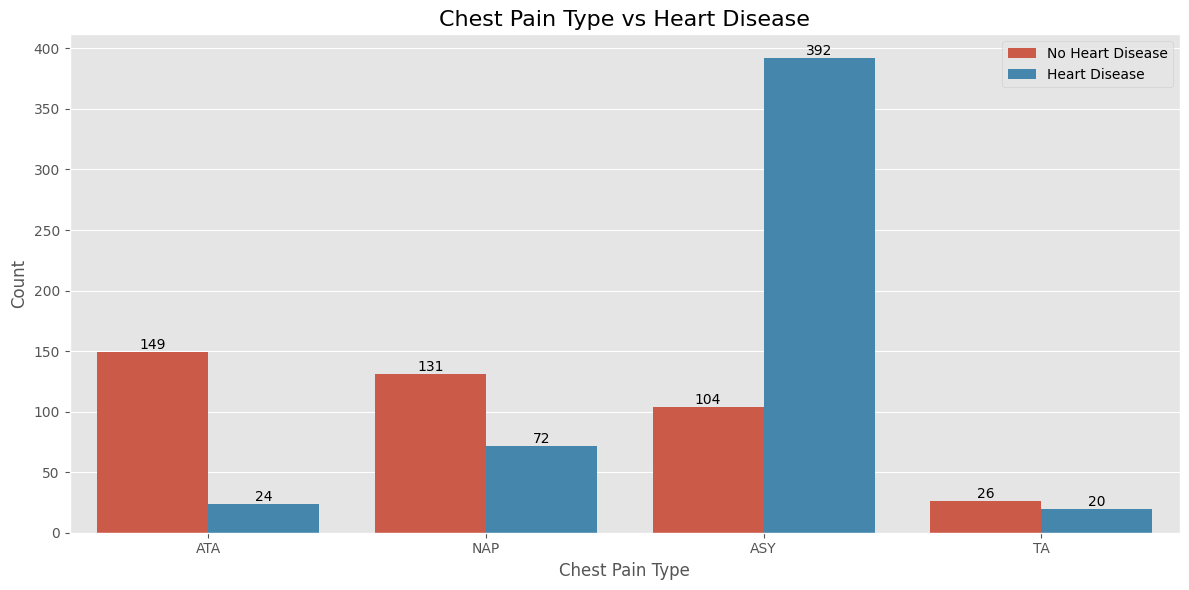

Types of Chest Pain:
ASY: Asymptomatic
ATA: Atypical Angina
NAP: Non-Anginal Pain
TA: Typical Angina


In [46]:
# Chest pain type by heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('Chest Pain Type vs Heart Disease', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.savefig('visualizations/chest_pain_by_heart_disease.png')
plt.show()

# Create a breakdown of ChestPainType
print("Types of Chest Pain:")
print("ASY: Asymptomatic")
print("ATA: Atypical Angina")
print("NAP: Non-Anginal Pain")
print("TA: Typical Angina")

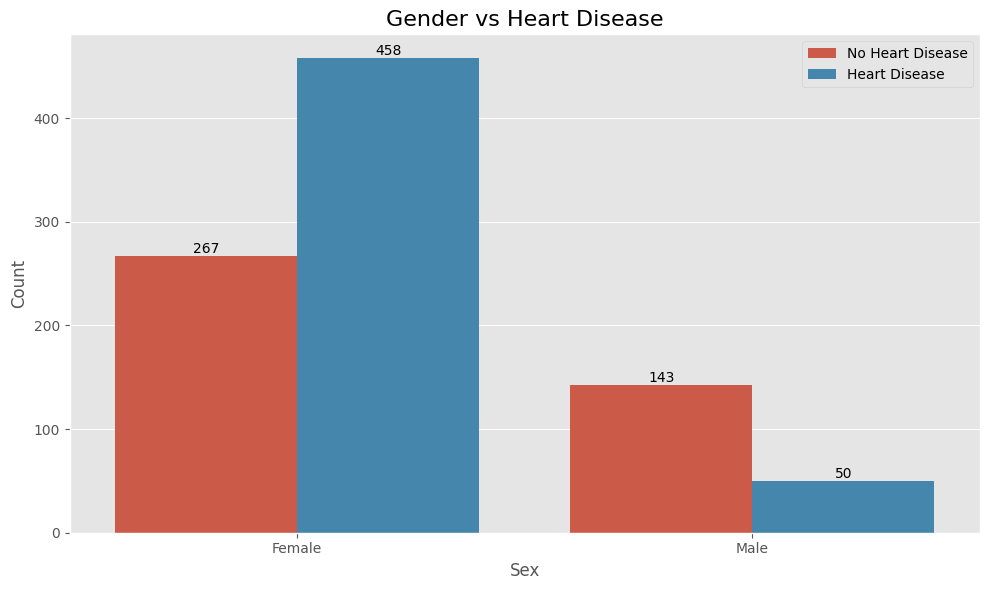

In [47]:
# Sex vs Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Gender vs Heart Disease', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.savefig('visualizations/sex_by_heart_disease.png')
plt.show()

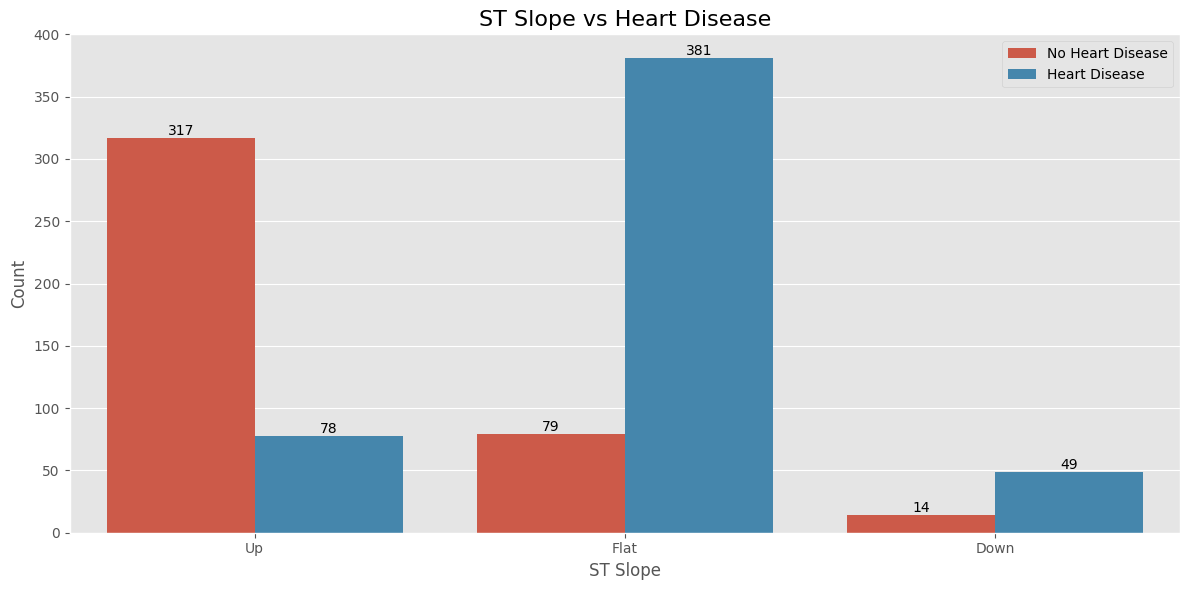

In [48]:
# ST_Slope vs Heart Disease
plt.figure(figsize=(12, 6))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title('ST Slope vs Heart Disease', fontsize=16)
plt.xlabel('ST Slope', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
for i in plt.gca().containers:
    plt.gca().bar_label(i)
plt.tight_layout()
plt.savefig('visualizations/st_slope_by_heart_disease.png')
plt.show()

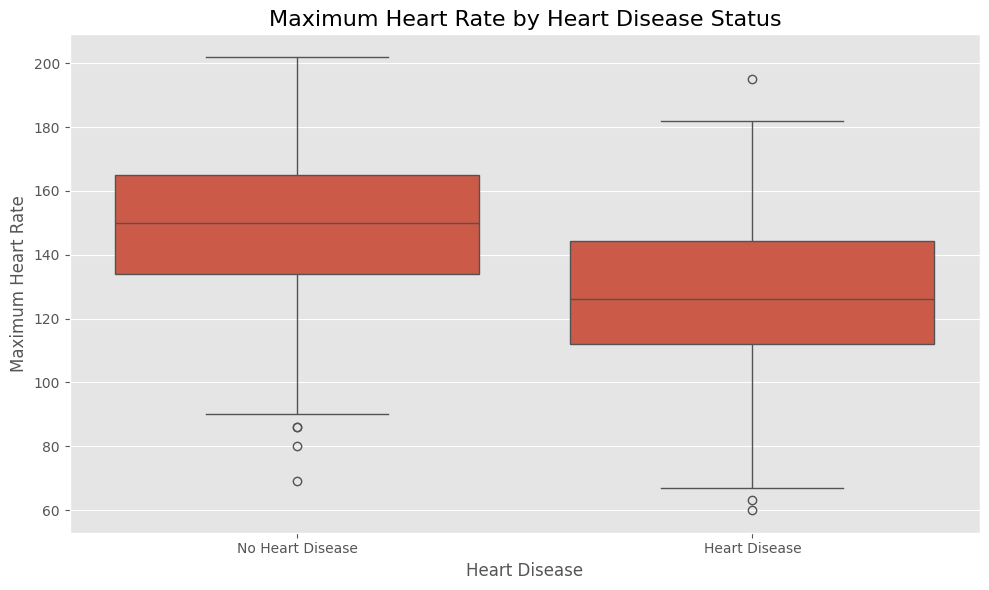

In [49]:
# Max Heart Rate by Heart Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('Maximum Heart Rate by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.savefig('visualizations/maxhr_by_heart_disease.png')
plt.show()

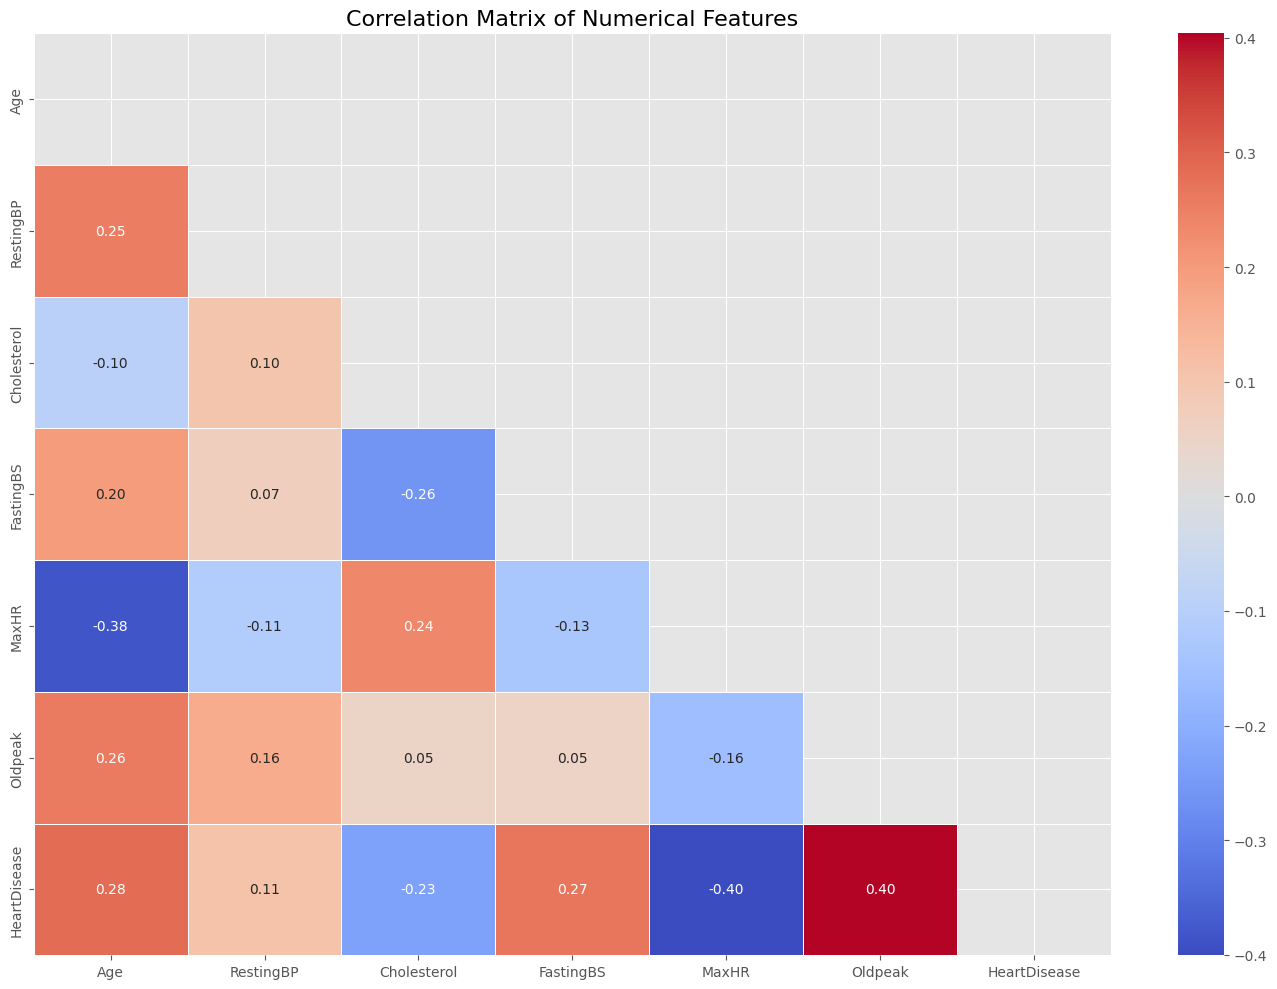

In [50]:
# Correlation Matrix
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('visualizations/correlation_matrix.png')
plt.show()

## 5. Building a Predictive Model
Now, let's build a logistic regression model to predict heart disease based on the features we've explored.

In [51]:
# Prepare the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Display the features after encoding
print(f"Features after one-hot encoding: {X.shape[1]}")
X.head()

Features after one-hot encoding: 15


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set shape: (734, 15)
Testing set shape: (184, 15)


In [53]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



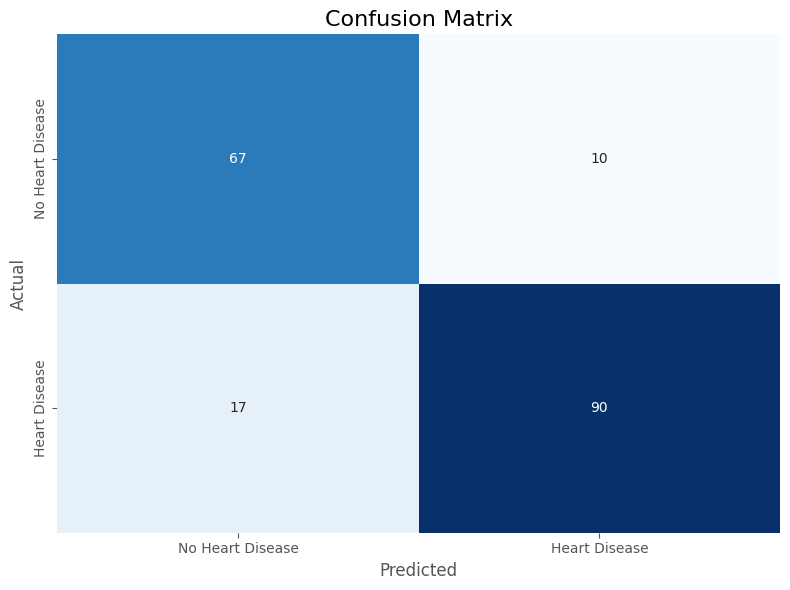

In [54]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.xticks([0.5, 1.5], ['No Heart Disease', 'Heart Disease'])
plt.yticks([0.5, 1.5], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.savefig('visualizations/confusion_matrix.png')
plt.show()

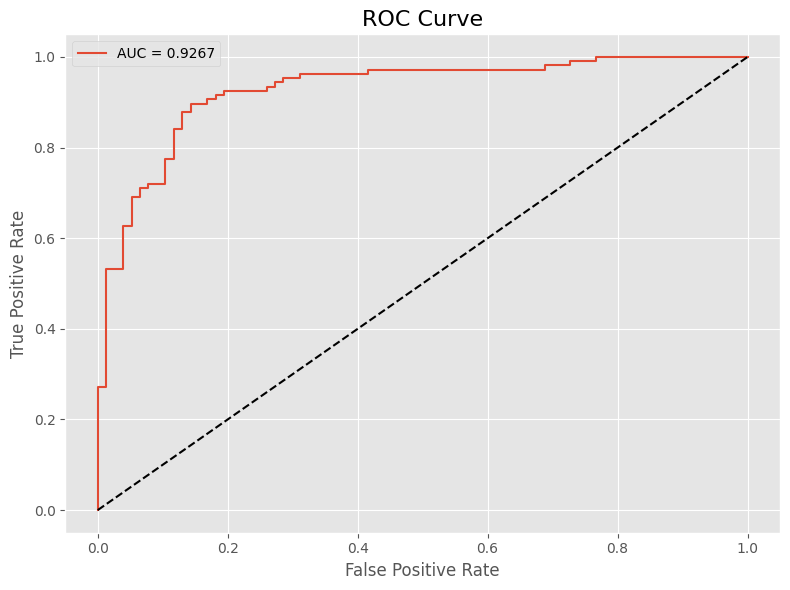

In [55]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/roc_curve.png')
plt.show()

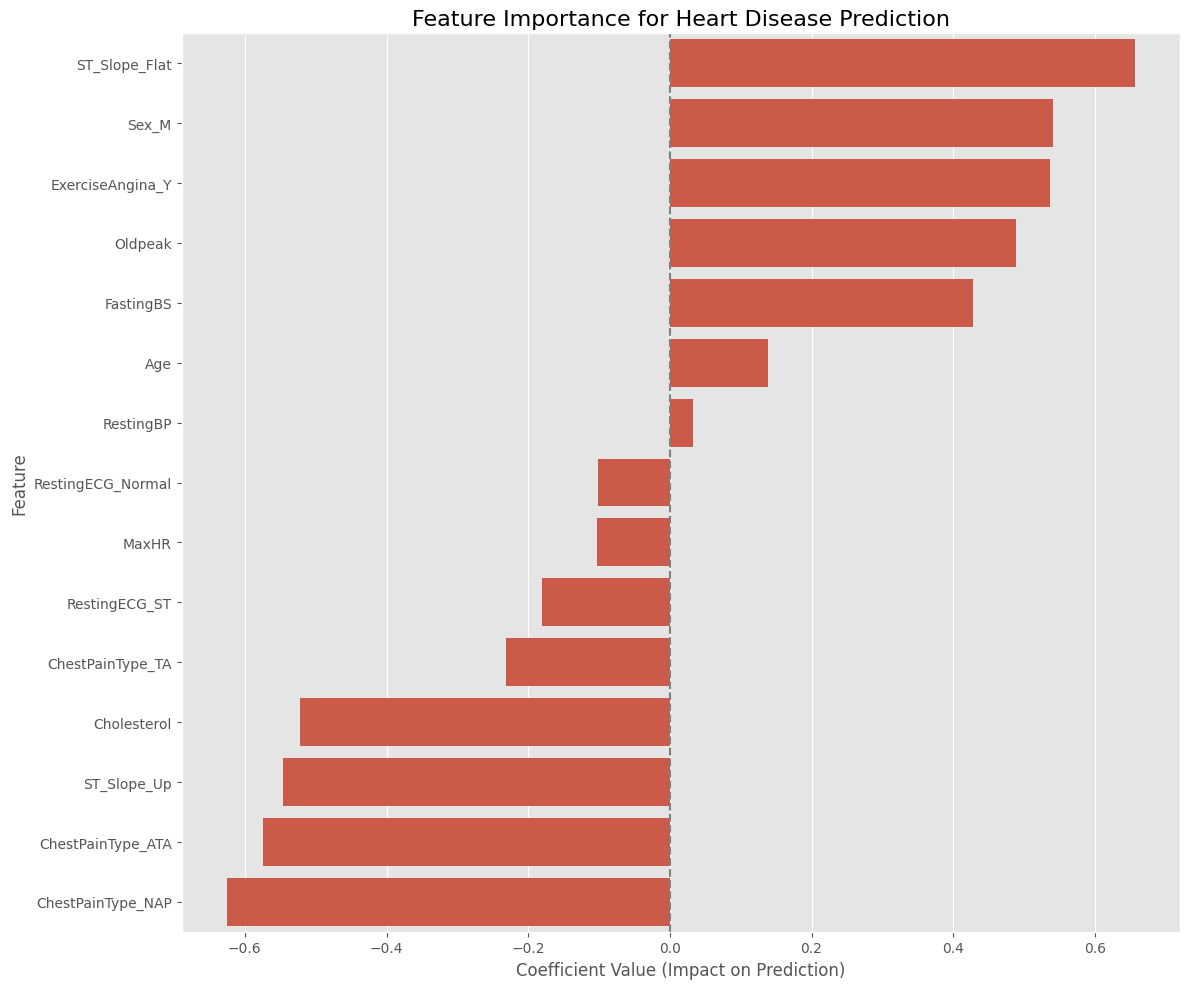

Top features that increase heart disease likelihood:
              Feature  Coefficient
13      ST_Slope_Flat     0.656132
6               Sex_M     0.540404
12   ExerciseAngina_Y     0.536653
5             Oldpeak     0.488339
3           FastingBS     0.427477
0                 Age     0.138996
1           RestingBP     0.032761
10  RestingECG_Normal    -0.101987
4               MaxHR    -0.102167
11      RestingECG_ST    -0.180196

Top features that decrease heart disease likelihood:
              Feature  Coefficient
0                 Age     0.138996
1           RestingBP     0.032761
10  RestingECG_Normal    -0.101987
4               MaxHR    -0.102167
11      RestingECG_ST    -0.180196
9    ChestPainType_TA    -0.231396
2         Cholesterol    -0.522455
14        ST_Slope_Up    -0.545914
7   ChestPainType_ATA    -0.573845
8   ChestPainType_NAP    -0.625306


In [56]:
# Feature importance
coefficients = pd.DataFrame(
    {'Feature': X.columns, 'Coefficient': model.coef_[0]}
)
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance for Heart Disease Prediction', fontsize=16)
plt.xlabel('Coefficient Value (Impact on Prediction)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.savefig('visualizations/feature_importance.png')
plt.show()

# Top positive features (increasing likelihood of heart disease)
print("Top features that increase heart disease likelihood:")
print(coefficients.head(10))

# Top negative features (decreasing likelihood of heart disease)
print("\nTop features that decrease heart disease likelihood:")
print(coefficients.tail(10))

## 6. Conclusions and Next Steps

### Key Findings:
1. The model achieved good performance with an accuracy score and AUC indicating strong predictive power.
2. Certain chest pain types, particularly Asymptomatic (ASY), are strong indicators of heart disease.
3. ST slope patterns show a clear relationship with heart disease diagnosis.
4. Age and sex play important roles in heart disease risk, with men generally showing higher risk.
5. Maximum heart rate tends to be lower in patients with heart disease.

### Clinical Implications:
- The model can help in early identification of high-risk patients.
- The feature importance analysis provides insights into which factors clinicians should pay special attention to.


      ## Thank You